# Logistic Regression From Scratch in Python (EMNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from os import listdir
from os.path import isdir, join
import time

# Show image
import matplotlib.image as img
from PIL import Image

# Step 0: Show Image

## PIL

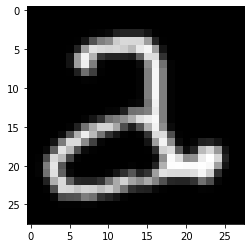

In [2]:
image =  Image.open("./EMNIST/a/1.jpg")
plt.imshow(image, cmap='gray')
plt.show()

## matplot

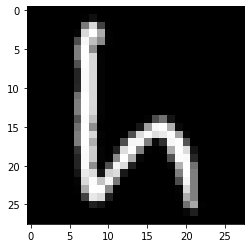

In [3]:
image = img.imread("./EMNIST/h/1.jpg")
plt.imshow(image, cmap='gray')
plt.show()

# Step 1: Load Data

In [4]:
path = './EMNIST'

## All targets

Method 1

In [5]:
for filename in listdir(path):
    if isdir(join(path, filename)):
        print(filename)

h
b
g
f
e
d
a
c


Method 2

In [6]:
all_targets = [name for name in listdir(path) if isdir (join(path, name))]
print("all tragets: ", all_targets)

all tragets:  ['h', 'b', 'g', 'f', 'e', 'd', 'a', 'c']


## Total samples

In [7]:
num_samples = 0

for target in all_targets:
    print(len(listdir(join(path, target))))
    num_samples += len(listdir(join(path, target)))

print("Total samples: ", num_samples)

128
128
128
128
128
128
128
128
Total samples:  1024


## All File names

In [8]:
target_list = all_targets
filenames = []
y = []
for idx, target in enumerate(target_list):
    print(join(path, target))
    filenames.append(listdir(join(path, target)))
    y.append(np.ones(len(filenames[idx])) * idx)


./EMNIST/h
./EMNIST/b
./EMNIST/g
./EMNIST/f
./EMNIST/e
./EMNIST/d
./EMNIST/a
./EMNIST/c


## Number of items in each file

In [9]:
for item in y:
    print(len(item))

128
128
128
128
128
128
128
128


## Prepare Dataset

In [10]:
dataset = []
for idx, target in enumerate(target_list):
    label = 0
    for img_name in listdir(join(path, target)):
        
        # file path
        file_path = join(path, target, img_name)
        # print(file_path)
        
        # image
        image = img.imread(file_path)
        image = np.array(image)
        
        # label
        if target == 'a':
            label = 0
            
        elif target == 'b':
            label = 1
            
        elif target == 'c':
            label = 2
            
        elif target == 'd':
            label = 3
            
        elif target == 'e':
            label = 4
            
        elif target == 'f':
            label = 5
            
        elif target == 'g':
            label = 6
            
        elif target == 'h':
            label = 7
        
        
        dataset.append([image, label])


## Test: Show the example in data set

In [11]:
img_tensor, label = dataset[0]

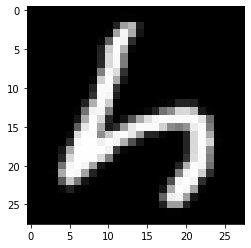

In [12]:
plt.imshow(img_tensor, cmap='gray')

In [13]:
print(img_tensor)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  50   0   0   

In [14]:
print(label)

7


## Show data

In [15]:
def show_data(data_set):
    cnt = 0
    for data in data_set:
        img_array, img_label = data
        
        plt.imshow(img_array, cmap='gray')
        plt.show()
        print("img_tensor: ", img_tensor)
        print("img_label: ", img_label)
        print("---------------------------------------------------")
        cnt+=1
        if cnt == 10:
            break

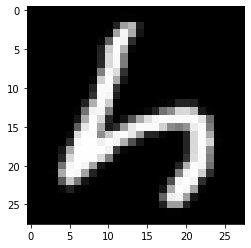

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

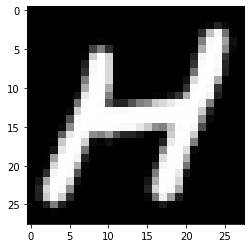

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

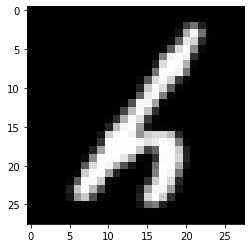

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

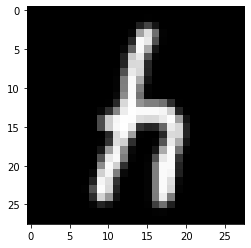

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

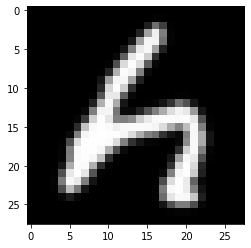

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

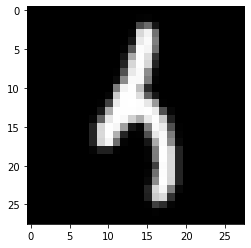

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

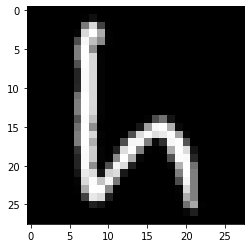

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

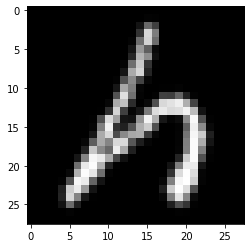

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

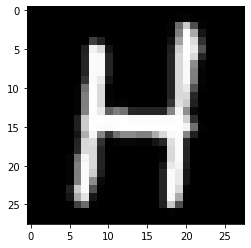

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

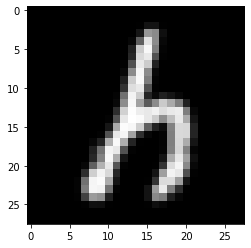

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

In [16]:
show_data(dataset)

## Random Shuffle

In [17]:
random.shuffle(dataset)

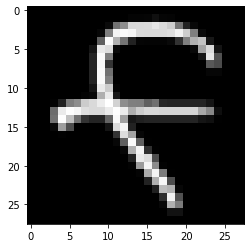

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

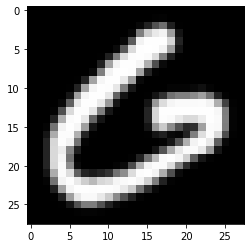

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

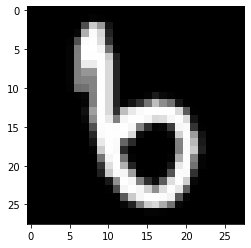

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

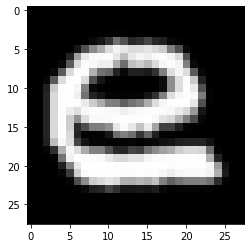

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

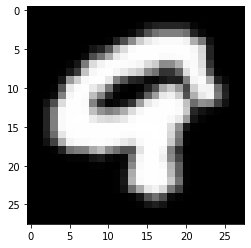

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

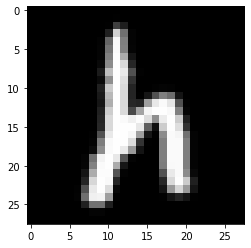

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

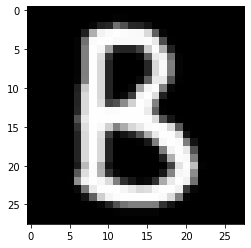

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

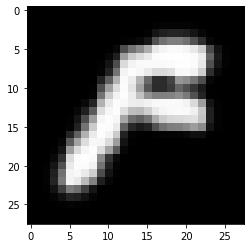

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

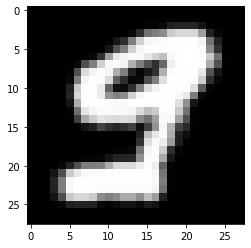

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

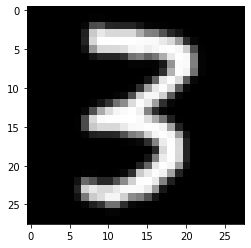

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

In [18]:
show_data(dataset)

## Train test split

In [19]:
import math

In [20]:
def train_test_split(dataset, split=0.80):
    n_train = math.floor(split * dataset.shape[0])
    n_test = math.ceil(split * dataset.shape[0])
    dataset_train = dataset[:n_train]
    dataset_test = dataset[n_train:]
    
    return dataset_train, dataset_test

In [21]:
dataset = np.array(dataset, dtype=object) 

In [22]:
train_set, test_set = train_test_split(dataset, split=0.80)

## Show train_set (shuffled)

In [23]:
print(len(train_set))

819


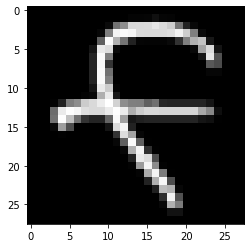

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

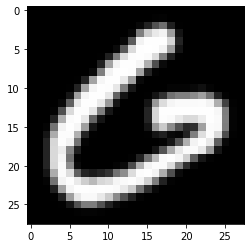

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

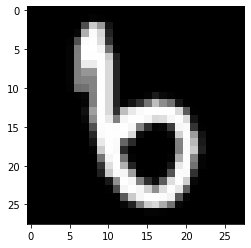

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

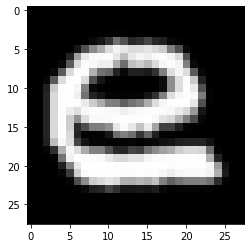

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

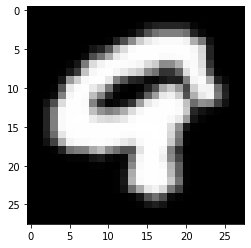

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

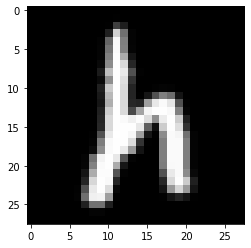

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

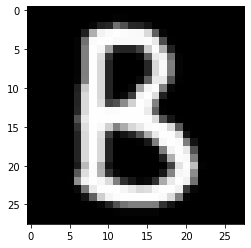

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

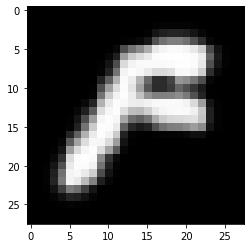

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

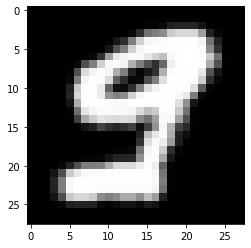

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

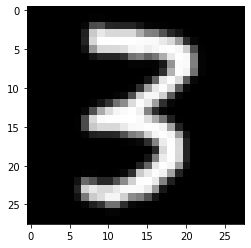

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

In [24]:
show_data(train_set)

In [25]:
print(len(test_set))

205


## Show test_set (shuffled)

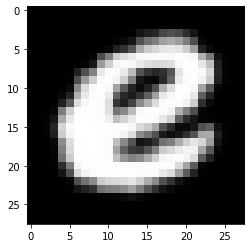

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

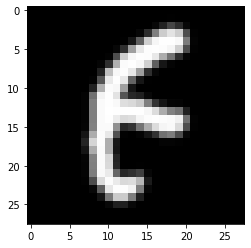

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

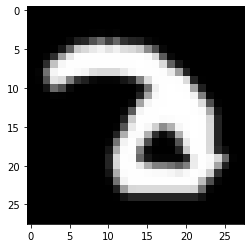

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

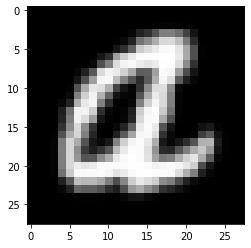

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

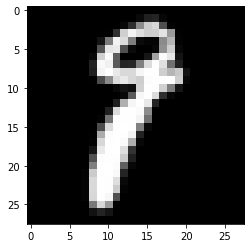

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

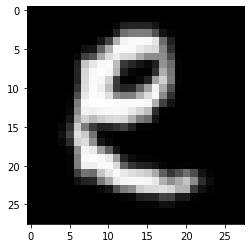

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

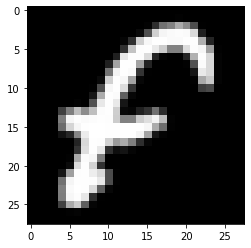

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

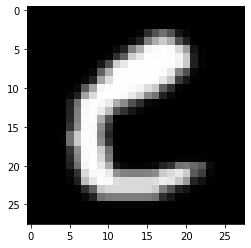

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

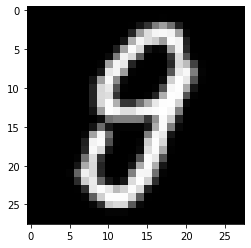

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

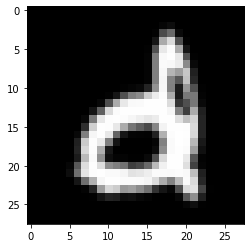

img_tensor:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   3   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  35 158 183  31   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   7 163 245 170  21   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7  95 251 244  46   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 202 252 177   7   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  37 217 250 127   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 217 249 125   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 127 246 220  

In [26]:
show_data(test_set)

In [27]:
train_set

array([[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   4,   5,  16,   5,   4,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 114, 141,
        216, 217, 218, 229, 218, 204, 116,  34,   8,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   7, 127, 244, 250,
        245, 218, 217, 217, 217, 221, 241, 204, 127,  10,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 251, 177, 116,
         34,   5,   4,   4,   4,   9,  50, 127, 176, 194,  23,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21, 232, 221,  11,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   9, 163, 218,  20,   0,
          0,   0],
  

In [28]:
train_set.shape

(819, 2)

# Step 2: Prepare (Xtrain, Ytrain) & (Xtest, Ytest)

## Xtrain, Ytrain

In [29]:
Xtrain = []
Ytrain = []
for i in range(len(train_set)):
    Xtrain.append(train_set[i][0])
    Ytrain.append(train_set[i][1])
    
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
print("Xtrain shape: ", Xtrain.shape)
print("Ytrain shape: ", Ytrain.shape)

Xtrain shape:  (819, 28, 28)
Ytrain shape:  (819,)


## Xtest, Ytest

In [30]:
Xtest = []
Ytest = []
for i in range(len(test_set)):
    Xtest.append(test_set[i][0])
    Ytest.append(test_set[i][1])
    
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)
print("Xtest shape: ", Xtest.shape)
print("Ytest shape: ", Ytest.shape)

Xtest shape:  (205, 28, 28)
Ytest shape:  (205,)


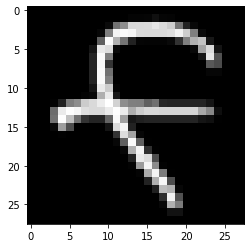

In [31]:
plt.imshow(Xtrain[0], cmap='gray')

In [32]:
# X_train[0]

In [33]:
Ytrain[0]

5

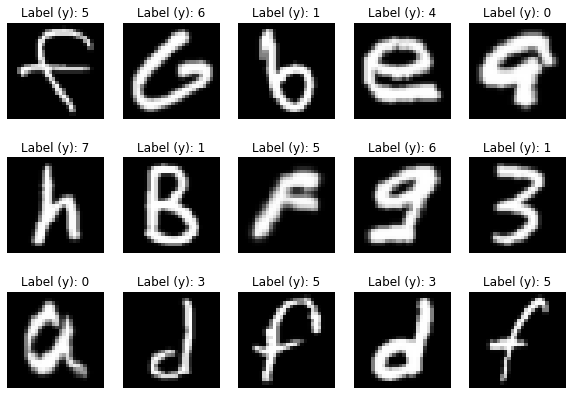

In [34]:
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=Ytrain[i]))
    plt.axis('off')

## Flatten this 28x28 into a vector of length 784(28*28)

Xtrain is a matrix with 819 rows and 784 columns.

m = 819; n = 784

In [35]:
print('Xtrain shape: ', Xtrain.shape)
print('Xtest shape: ', Xtest.shape)

Xtrain shape:  (819, 28, 28)
Xtest shape:  (205, 28, 28)


In [36]:
X_train = Xtrain.reshape(Xtrain.shape[0],28*28)
X_test = Xtest.reshape(Xtest.shape[0],28*28)
Y_train = Ytrain
Y_test = Ytest

In [37]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (819, 784)
X_test shape:  (205, 784)


## Normalize

In [38]:
X_train = X_train/255
X_test = X_test/255

# Step 3: Logistic Regression Model

In [39]:
# # https://towardsdatascience.com/softmax-regression-in-python-multi-class-classification-3cb560d90cb2

## One-hot Encoding

In [40]:
# Multi-dimensional indexing in NumPy
def one_hot(y, c):
    
    # y--> label/ground truth.
    # c--> Number of classes.
    
    # A zero matrix of size (m, c)
    y_hot = np.zeros((len(y), c))
    
    # Putting 1 for column where the label is,
    # Using multidimensional indexing.
    y_hot[np.arange(len(y)), y] = 1
    
    return y_hot

In [41]:
print('Y_train: ', Y_train)

Y_train:  [5 6 1 4 0 7 1 5 6 1 0 3 5 3 5 7 5 1 0 7 2 1 5 5 5 0 4 5 5 6 2 0 4 2 2 0 6
 1 3 5 1 2 1 1 5 7 1 3 6 7 4 2 7 2 0 3 6 1 4 0 0 4 7 4 0 0 5 1 3 7 3 5 0 5
 7 5 4 5 3 5 6 0 7 0 6 1 6 7 1 6 1 1 3 1 3 4 6 7 4 3 3 6 0 7 1 6 5 0 4 3 7
 4 3 4 0 4 7 0 7 0 3 0 4 6 6 2 1 2 6 3 4 1 0 2 0 0 4 5 4 7 5 7 1 6 3 3 7 3
 3 4 0 7 2 2 5 1 1 6 2 1 3 7 1 4 2 0 1 3 0 6 0 6 3 4 4 6 4 2 3 3 4 6 0 4 2
 4 6 7 5 3 3 5 7 5 7 5 4 2 3 3 7 5 5 0 1 7 0 2 1 0 4 0 0 5 6 7 4 5 7 1 1 5
 1 6 2 5 1 1 0 1 2 1 3 1 2 3 3 1 2 1 3 1 6 7 1 2 7 5 0 4 2 1 7 4 1 5 1 7 7
 6 1 4 6 2 2 7 5 7 4 0 4 2 1 0 4 6 6 3 5 7 0 2 5 2 0 1 1 5 5 7 1 4 7 0 3 7
 2 4 4 5 1 7 7 7 5 4 3 3 5 2 6 5 0 7 6 5 1 2 5 5 4 4 2 4 3 3 2 4 1 5 6 7 7
 5 3 5 2 2 3 6 3 2 3 0 7 6 2 7 3 7 1 6 1 2 5 6 5 5 0 7 6 1 3 2 0 1 1 5 7 6
 0 6 0 3 5 7 7 2 0 1 2 6 4 4 3 2 1 7 2 5 7 4 7 5 5 1 3 1 0 0 3 7 4 2 1 3 3
 7 5 6 4 5 5 6 0 4 3 1 3 2 4 3 2 5 3 1 4 7 7 0 6 2 1 2 4 5 3 2 2 1 2 2 5 2
 5 6 0 6 4 5 5 4 4 7 2 0 6 0 2 0 3 3 6 3 6 4 5 5 3 1 6 2 5 3 5 2 0 2 5 4 1
 6 4 7 7 0 6 7 

In [42]:
Y_train_one_hot = one_hot(Ytrain,8)
print('Y_train_one_hot: ', Y_train_one_hot)

Y_train_one_hot:  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Softmax

In [43]:
def softmax(z):
    
    # z--> linear part.
    
    # subtracting the max of z for numerical stability.
    exp = np.exp(z - np.max(z))
    
    # Calculating softmax for all examples.
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
        
    return exp

## Fit the model (w/ training data)

In [44]:
def fit(X, y, lr, c, epochs):
    
    # X --> Input.
    # y --> true/target value.
    # lr --> Learning rate.
    # c --> Number of classes.
    # epochs --> Number of iterations.
    
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias randomly.
    w = np.random.random((n, c))
    b = np.random.random(c)
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        
        # Calculating hypothesis/prediction.
        z = X@w + b
        y_hat = softmax(z)
        
        # One-hot encoding y.
        y_hot = one_hot(y, c)
        
        # Calculating the gradient of loss w.r.t w and b.
        w_grad = (1/m)*np.dot(X.T, (y_hat - y_hot)) 
        b_grad = (1/m)*np.sum(y_hat - y_hot)
        
        # Updating the parameters.
        w = w - lr*w_grad
        b = b - lr*b_grad
        
        # Calculating loss and appending it in the list.
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)
        # Printing out the loss at every 100th iteration.
        if epoch%100==0:
            print('Epoch {epoch} ==> Loss = {loss}'
                  .format(epoch=epoch, loss=loss))
    return w, b, losses

In [45]:
# # Training
# w, b, l = fit(X_train, Y_train, lr=0.01, c=8, epochs=5000)

In [46]:
# plt.plot(l, linestyle='solid', color='cornflowerblue', label='loss')
# plt.title("Logistic Regression")
# plt.ylabel("loss")
# plt.xlabel("epoch")
# plt.legend(['training loss'],loc='upper right')
# plt.show()


# Step 4: Evaluate

## Predict

In [47]:
def predict(X, w, b):
    
    # X --> Input.
    # w --> weights.
    # b --> bias.
    
    # Predicting
    z = X@w + b
    y_hat = softmax(z)
    
    # Returning the class with highest probability.
    return np.argmax(y_hat, axis=1)

## Accuracy

In [48]:
def accuracy(y, y_hat):
    return np.sum(y==y_hat)/len(y)

##  Train Predict

In [49]:
# train_preds = predict(X_train, w, b)

In [50]:
# train_preds

In [51]:
# accuracy(Y_train, train_preds)

## Test Predict

In [52]:
# test_preds = predict(X_test, w, b)

In [53]:
# accuracy(Y_test, test_preds)

In [54]:
# class_list = ['a','b','c','d','e','f','g','h']

# fig = plt.figure(figsize=(15,10))
# for i in range(40):  
#     ax = fig.add_subplot(5, 8, i+1)
#     ax.imshow(Xtest[i], cmap='gray')
    
#     ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=class_list[Ytest[i]], y_hat=class_list[test_preds[i]]))
#     plt.axis('off')

# Q1: Plot the learning curves of the loss function and the accuracy

## Fit the model

In [55]:
def fit_(X_train, y_train, X_test, y_test, lr, c, epochs):
    
    # X_train --> Training input.
    # y_train --> Training true/target value.
    
    # X_test --> Testing input.
    # y_test --> Testing true/target value.
    
    # lr --> Learning rate.
    # c --> Number of classes.
    # epochs --> Number of iterations.
    
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X_train.shape
    
    # Initializing weights and bias randomly.
    w = np.random.random((n, c))
    b = np.random.random(c)
    # Empty list to store losses.
    train_losses = []
    test_losses = []
    # Empty list to store accuracy.
    train_acc = []
    test_acc = []
    
    # Training loop.
    for epoch in range(epochs):
        for phase in ['train', 'test']:
            
            if phase == 'train':
                # Calculating hypothesis/prediction.
                z = X_train@w + b
                y_hat = softmax(z)

                # One-hot encoding y.
                y_hot = one_hot(y_train, c)

                # Calculating the gradient of loss w.r.t w and b.
                w_grad = (1/m)*np.dot(X_train.T, (y_hat - y_hot)) 
                b_grad = (1/m)*np.sum(y_hat - y_hot)

                # Updating the parameters.
                w = w - lr*w_grad
                b = b - lr*b_grad

                # Calculating loss and appending it in the list.
                train_loss = -np.mean(np.log(y_hat[np.arange(len(y_train)), y_train]))
                train_losses.append(train_loss)
                
                # Calculating accuracy and appending it in the list.
                train_preds = predict(X_train, w, b)
                train_accuracy = accuracy(Y_train, train_preds)
                train_acc.append(train_accuracy)
            
            elif phase == 'test':
                # Calculating hypothesis/prediction.
                z = X_test@w + b
                y_hat = softmax(z)

                # One-hot encoding y.
                y_hot = one_hot(y_test, c)

                # Calculating loss and appending it in the list.
                test_loss = -np.mean(np.log(y_hat[np.arange(len(y_test)), y_test]))
                test_losses.append(test_loss)
                
                # Calculating accuracy and appending it in the list.
                test_preds = predict(X_test, w, b)
                test_accuracy = accuracy(Y_test, test_preds)
                test_acc.append(test_accuracy)
        
        
        # Printing out the loss at every 100th iteration.
        if epoch%10==0:
            print('Epoch {epoch} ==> Training Loss = {train_loss}, Testing Loss = {test_loss}'
                  .format(epoch=epoch, train_loss=train_loss, test_loss=test_loss))

    return w, b, train_losses, test_losses , train_acc, test_acc



In [56]:
# Training
w, b, train_losses, test_losses, train_acc, test_acc = fit_(X_train, Y_train, X_test, Y_test, lr=0.1, c=8, epochs=1000)

Epoch 0 ==> Training Loss = 5.303245446833286, Testing Loss = 4.758626924317877
Epoch 10 ==> Training Loss = 2.646116189233125, Testing Loss = 2.7763299822154703
Epoch 20 ==> Training Loss = 1.9896316042389959, Testing Loss = 2.2621295846467735
Epoch 30 ==> Training Loss = 1.6217366512372995, Testing Loss = 1.9489967068622929
Epoch 40 ==> Training Loss = 1.3893690869033133, Testing Loss = 1.7499647403507785
Epoch 50 ==> Training Loss = 1.2303084698084918, Testing Loss = 1.6134583672944685
Epoch 60 ==> Training Loss = 1.114268528216705, Testing Loss = 1.5143762893240524
Epoch 70 ==> Training Loss = 1.0254797956334378, Testing Loss = 1.4393732261752463
Epoch 80 ==> Training Loss = 0.9550301840816673, Testing Loss = 1.380736363740866
Epoch 90 ==> Training Loss = 0.89751891921443, Testing Loss = 1.3337251337096379
Epoch 100 ==> Training Loss = 0.8494870327225764, Testing Loss = 1.2952723322616317
Epoch 110 ==> Training Loss = 0.8086215291910849, Testing Loss = 1.2633049610731444
Epoch 120 

Epoch 980 ==> Training Loss = 0.26622975137772376, Testing Loss = 1.044020624213216
Epoch 990 ==> Training Loss = 0.26465523697484783, Testing Loss = 1.0446109215296495


## Learning curve - loss function

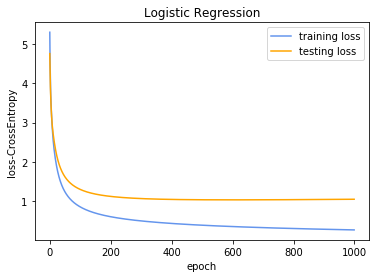

In [57]:
plt.title("Logistic Regression")

plt.ylabel("loss-CrossEntropy")
plt.xlabel("epoch")

plt.plot(train_losses, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(test_losses, linestyle='solid', color='orange', label='loss')
plt.legend(['training loss','testing loss'],loc='upper right')

plt.show()

## Learning curve - accuracy

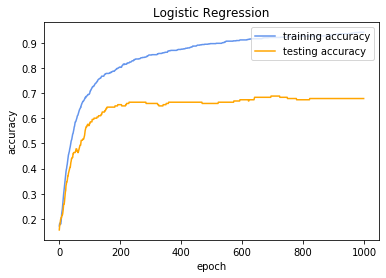

In [58]:
plt.title("Logistic Regression")

plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.plot(train_acc, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(test_acc, linestyle='solid', color='orange', label='loss')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')

plt.show()

# Q2: Show the final classification accuracy and loss value of training and testing data.

## Training data - loss

In [59]:
print('Training loss (final): ', train_losses[-1])

Training loss (final):  0.2632559616820929


## Training data - accuracy

In [60]:
train_preds = predict(X_train, w, b)

In [61]:
# train_preds

In [62]:
print('Training accuracy (final): ', accuracy(Y_train, train_preds))

Training accuracy (final):  0.9413919413919414


## Testing data - loss

In [63]:
print('Testing loss (final): ', test_losses[-1])

Testing loss (final):  1.0451473561360465


## Testing data - accuracy

In [64]:
test_preds = predict(X_test, w, b)

In [65]:
accuracy(Y_test, test_preds)

0.6780487804878049

## Show the testing result

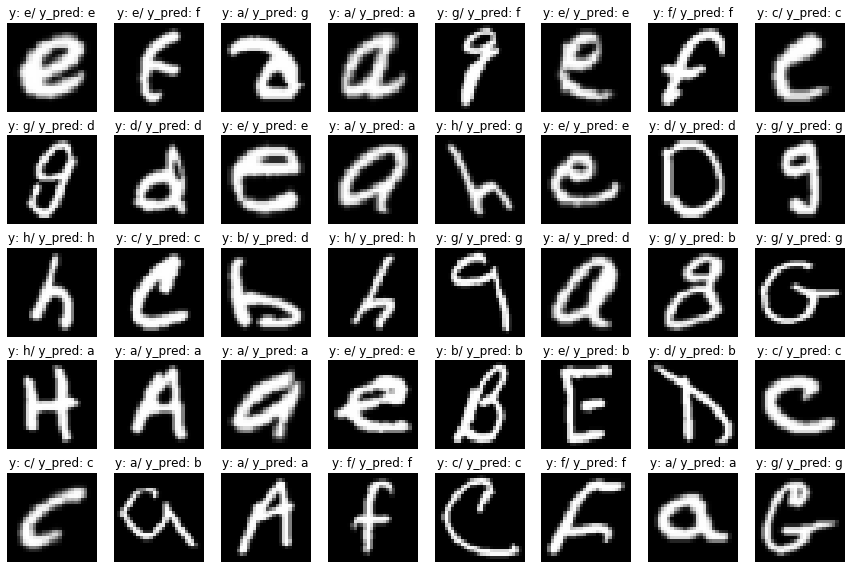

In [66]:
class_list = ['a','b','c','d','e','f','g','h']

fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(Xtest[i], cmap='gray')
    
    ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=class_list[Ytest[i]], y_hat=class_list[test_preds[i]]))
    plt.axis('off')

# Q3: Different algorithm (batch GD, SGD, mini-batch SGD)

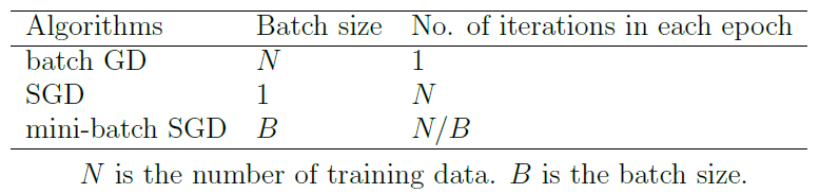

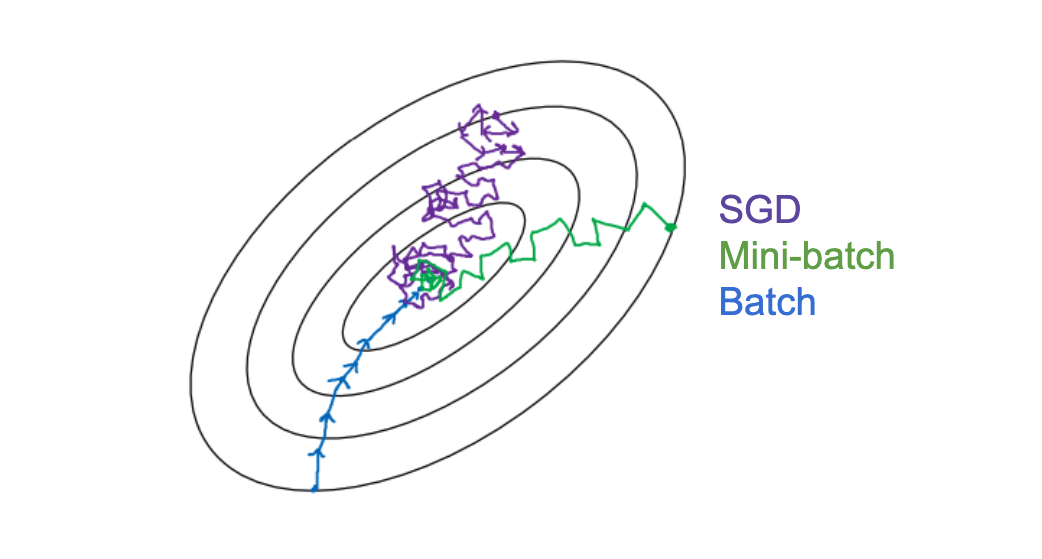

In [67]:
# https://github.com/tz28/deep-learning/blob/master/deep_neural_network_with_gd.py

In [68]:
# https://ja.d2l.ai/chapter_deep-learning-basics/linear-regression-scratch.html

In [69]:
def data_iter(batch_size, features, labels):
    n_examples = len(features)
    indices = list(range(n_examples))
    random.shuffle(indices)
    for i in range(0, n_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, n_examples)])
        yield features[batch_indices], labels[batch_indices]

In [70]:
def sgd(w, b, lr, batch_size, w_grad, b_grad):
    w = w - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size
    return w,b

In [71]:
def fit_GD(X_train, y_train, X_test, y_test, lr, c, epochs, batch_size):
    
    # X_train --> Training input.
    # y_train --> Training true/target value.
    
    # X_test --> Testing input.
    # y_test --> Testing true/target value.
    
    # lr --> Learning rate.
    # c --> Number of classes.
    # epochs --> Number of iterations.
    
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X_train.shape
    
#     # Initializing weights and bias randomly.
#     w = np.random.random((n, c))
#     b = np.random.random(c)
    
    # Initializing weights and bias.
    w = np.zeros((n, c))
    b = np.zeros(c)
    
    
    # Empty list to store losses.
    train_losses = []
    test_losses = []
    # Empty list to store accuracy.
    train_acc = []
    test_acc = []
    
    # Training loop.
    for epoch in range(epochs):
        for phase in ['train', 'test']:
            
            if phase == 'train':
                for X, y in data_iter(batch_size, X_train, y_train):
                    # Calculating hypothesis/prediction.
                    z = X@w + b
                    y_hat = softmax(z)

                    # One-hot encoding y.
                    y_hot = one_hot(y, c)

                    # Calculating the gradient of loss w.r.t w and b.
                    w_grad = (1/m)*np.dot(X.T, (y_hat - y_hot)) 
                    b_grad = (1/m)*np.sum(y_hat - y_hot)

                    # Updating the parameters.
                    w, b = sgd(w, b, lr, batch_size, w_grad, b_grad)

                # Calculating loss and appending it in the list.
                train_loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
                train_losses.append(train_loss)

                # Calculating accuracy and appending it in the list.
                train_preds = predict(X_train, w, b)
                train_accuracy = accuracy(Y_train, train_preds)
                train_acc.append(train_accuracy)

            elif phase == 'test':
                for X_, y_ in data_iter(batch_size, X_test, y_test):
                    # Calculating hypothesis/prediction.
                    z = X_@w + b
                    y_hat = softmax(z)

                    # One-hot encoding y.
                    y_hot = one_hot(y_test, c)

                # Calculating loss and appending it in the list.
                test_loss = -np.mean(np.log(y_hat[np.arange(len(y_)), y_]))
                test_losses.append(test_loss)

                # Calculating accuracy and appending it in the list.
                test_preds = predict(X_test, w, b)
                test_accuracy = accuracy(y_test, test_preds)
                test_acc.append(test_accuracy)
        
        
        # Printing out the loss at every 10th iteration.
        if epoch%100==0:
            print('Epoch {epoch} ==> Training Loss = {train_loss}, Testing Loss = {test_loss}'
                  .format(epoch=epoch, train_loss=train_loss, test_loss=test_loss))

    return w, b, train_losses, test_losses , train_acc, test_acc



## Batch Gradient Descent

### batch_size = n, lr = 0.1, epochs = 5000

In [72]:
start = time.time()

BGD_w, BGD_b, BGD_train_losses, BGD_test_losses, BGD_train_acc, BGD_test_acc = fit_GD(X_train, Y_train, X_test, Y_test, lr=0.1, c=8, epochs=50000, batch_size=len(X_train))

end = time.time()

BGD_time = end - start
print("training time: ", format(BGD_time))

Epoch 0 ==> Training Loss = 2.0794415416798353, Testing Loss = 2.0793208623585113
Epoch 100 ==> Training Loss = 2.065712332250895, Testing Loss = 2.06742418081081
Epoch 200 ==> Training Loss = 2.0523172927075772, Testing Loss = 2.0558442545963773
Epoch 300 ==> Training Loss = 2.039225877497049, Testing Loss = 2.0445512870557945
Epoch 400 ==> Training Loss = 2.026411876047086, Testing Loss = 2.0335196778464177
Epoch 500 ==> Training Loss = 2.013852790328379, Testing Loss = 2.022727419911363
Epoch 600 ==> Training Loss = 2.001529296769875, Testing Loss = 2.0121555795090353
Epoch 700 ==> Training Loss = 1.9894247822439204, Testing Loss = 2.0017878486830347
Epoch 800 ==> Training Loss = 1.9775249448605705, Testing Loss = 1.9916101607579844
Epoch 900 ==> Training Loss = 1.965817451267978, Testing Loss = 1.9816103605331978
Epoch 1000 ==> Training Loss = 1.9542916430523036, Testing Loss = 1.9717779218291398
Epoch 1100 ==> Training Loss = 1.9429382856653372, Testing Loss = 1.96210370593074
Epo

Epoch 9800 ==> Training Loss = 1.332176834841125, Testing Loss = 1.448670874278871
Epoch 9900 ==> Training Loss = 1.3279877827863922, Testing Loss = 1.4451544154085418
Epoch 10000 ==> Training Loss = 1.3238400835859707, Testing Loss = 1.4416722181850579
Epoch 10100 ==> Training Loss = 1.3197331852498388, Testing Loss = 1.4382238246208405
Epoch 10200 ==> Training Loss = 1.3156665437023527, Testing Loss = 1.4348087836666032
Epoch 10300 ==> Training Loss = 1.3116396226856564, Testing Loss = 1.4314266511070897
Epoch 10400 ==> Training Loss = 1.307651893663273, Testing Loss = 1.4280769894580705
Epoch 10500 ==> Training Loss = 1.3037028357239184, Testing Loss = 1.424759367864596
Epoch 10600 ==> Training Loss = 1.299791935485585, Testing Loss = 1.421473362000506
Epoch 10700 ==> Training Loss = 1.2959186869999386, Testing Loss = 1.418218553969205
Epoch 10800 ==> Training Loss = 1.2920825916570773, Testing Loss = 1.4149945322056854
Epoch 10900 ==> Training Loss = 1.2882831580906817, Testing Los

Epoch 19400 ==> Training Loss = 1.0606322733361246, Testing Loss = 1.2196626109767197
Epoch 19500 ==> Training Loss = 1.0587421462687723, Testing Loss = 1.2180630840378566
Epoch 19600 ==> Training Loss = 1.0568647652405403, Testing Loss = 1.216474363057349
Epoch 19700 ==> Training Loss = 1.0549999935420382, Testing Loss = 1.2148963359282858
Epoch 19800 ==> Training Loss = 1.0531476963276376, Testing Loss = 1.2133288920524852
Epoch 19900 ==> Training Loss = 1.05130774058646, Testing Loss = 1.2117719223170045
Epoch 20000 ==> Training Loss = 1.0494799951138423, Testing Loss = 1.2102253190710413
Epoch 20100 ==> Training Loss = 1.0476643304832702, Testing Loss = 1.2086889761032176
Epoch 20200 ==> Training Loss = 1.0458606190187751, Testing Loss = 1.2071627886192482
Epoch 20300 ==> Training Loss = 1.0440687347677833, Testing Loss = 1.2056466532199792
Epoch 20400 ==> Training Loss = 1.0422885534744148, Testing Loss = 1.2041404678797936
Epoch 20500 ==> Training Loss = 1.0405199525532214, Testi

Epoch 29000 ==> Training Loss = 0.9225511902071967, Testing Loss = 1.1032388400864825
Epoch 29100 ==> Training Loss = 0.9214544303974193, Testing Loss = 1.1023219580051598
Epoch 29200 ==> Training Loss = 0.92036285111759, Testing Loss = 1.1014096252340804
Epoch 29300 ==> Training Loss = 0.9192764106658353, Testing Loss = 1.1005018067658088
Epoch 29400 ==> Training Loss = 0.9181950677960597, Testing Loss = 1.099598467965419
Epoch 29500 ==> Training Loss = 0.9171187817118601, Testing Loss = 1.0986995745655788
Epoch 29600 ==> Training Loss = 0.9160475120605343, Testing Loss = 1.0978050926617087
Epoch 29700 ==> Training Loss = 0.9149812189271799, Testing Loss = 1.096914988707216
Epoch 29800 ==> Training Loss = 0.9139198628288849, Testing Loss = 1.0960292295087999
Epoch 29900 ==> Training Loss = 0.9128634047090052, Testing Loss = 1.095147782221827
Epoch 30000 ==> Training Loss = 0.9118118059315306, Testing Loss = 1.0942706143457794
Epoch 30100 ==> Training Loss = 0.9107650282755346, Testing

Epoch 38600 ==> Training Loss = 0.8361400411126025, Testing Loss = 1.0319551029903562
Epoch 38700 ==> Training Loss = 0.8353998755172636, Testing Loss = 1.0313558484259018
Epoch 38800 ==> Training Loss = 0.8346623305164457, Testing Loss = 1.0307589674159194
Epoch 38900 ==> Training Loss = 0.8339273898464952, Testing Loss = 1.0301644458863426
Epoch 39000 ==> Training Loss = 0.8331950373848809, Testing Loss = 1.0295722698805903
Epoch 39100 ==> Training Loss = 0.8324652571486464, Testing Loss = 1.028982425558306
Epoch 39200 ==> Training Loss = 0.831738033292884, Testing Loss = 1.028394899194113
Epoch 39300 ==> Training Loss = 0.8310133501092262, Testing Loss = 1.0278096771763834
Epoch 39400 ==> Training Loss = 0.8302911920243599, Testing Loss = 1.0272267460060263
Epoch 39500 ==> Training Loss = 0.8295715435985569, Testing Loss = 1.0266460922952878
Epoch 39600 ==> Training Loss = 0.8288543895242251, Testing Loss = 1.0260677027665692
Epoch 39700 ==> Training Loss = 0.8281397146244777, Testi

Epoch 48200 ==> Training Loss = 0.7751002014271983, Testing Loss = 0.9835649922496611
Epoch 48300 ==> Training Loss = 0.7745534773954447, Testing Loss = 0.9831428268149043
Epoch 48400 ==> Training Loss = 0.7740082874412513, Testing Loss = 0.982722081601234
Epoch 48500 ==> Training Loss = 0.7734646239139376, Testing Loss = 0.9823027497747414
Epoch 48600 ==> Training Loss = 0.7729224792167543, Testing Loss = 0.9818848245475164
Epoch 48700 ==> Training Loss = 0.7723818458063968, Testing Loss = 0.9814682991772419
Epoch 48800 ==> Training Loss = 0.7718427161925215, Testing Loss = 0.9810531669667969
Epoch 48900 ==> Training Loss = 0.7713050829372704, Testing Loss = 0.9806394212638596
Epoch 49000 ==> Training Loss = 0.7707689386547975, Testing Loss = 0.9802270554605195
Epoch 49100 ==> Training Loss = 0.7702342760108029, Testing Loss = 0.9798160629928877
Epoch 49200 ==> Training Loss = 0.7697010877220722, Testing Loss = 0.9794064373407184
Epoch 49300 ==> Training Loss = 0.7691693665560175, Tes

Learning curve - loss function

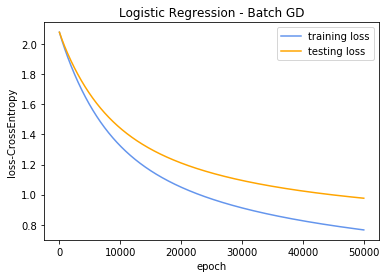

In [73]:
plt.title("Logistic Regression - Batch GD")

plt.ylabel("loss-CrossEntropy")
plt.xlabel("epoch")

plt.plot(BGD_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(BGD_test_losses, linestyle='solid', color='orange', label='loss')
plt.legend(['training loss','testing loss'],loc='upper right')

plt.show()

Learning curve - loss function

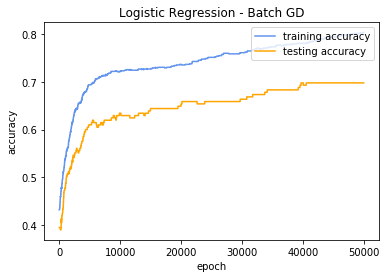

In [74]:
plt.title("Logistic Regression - Batch GD")

plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.plot(BGD_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(BGD_test_acc, linestyle='solid', color='orange', label='loss')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')

plt.show()

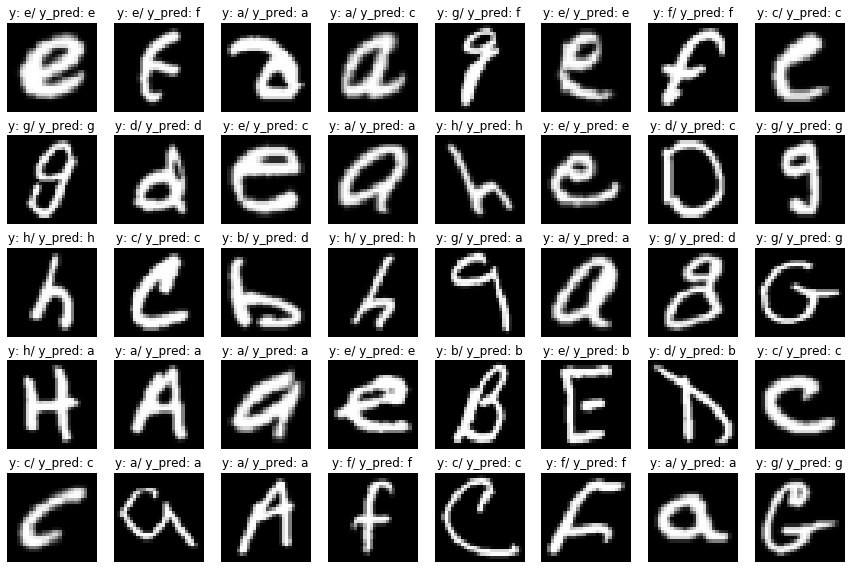

In [75]:
BGD_test_preds = predict(X_test, BGD_w, BGD_b)
class_list = ['a','b','c','d','e','f','g','h']

fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(Xtest[i], cmap='gray')
    
    ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=class_list[Ytest[i]], y_hat=class_list[BGD_test_preds[i]]))
    plt.axis('off')

## Stochasitc Gradient Descent (SGD)

### batch_size = 1, lr = 0.1, epochs = 5000

In [76]:
start = time.time()

SGD_w, SGD_b, SGD_train_losses, SGD_test_losses, SGD_train_acc, SGD_test_acc = fit_GD(X_train, Y_train, X_test, Y_test, lr=0.1, c=8, epochs=5000, batch_size=1)

end = time.time()

SGD_time = end - start
print("traing time: ", format(SGD_time))

Epoch 0 ==> Training Loss = 1.9347925011392084, Testing Loss = 2.005984550742826
Epoch 100 ==> Training Loss = 0.0847119628852516, Testing Loss = 0.23743873471659804
Epoch 200 ==> Training Loss = 0.3462748463688388, Testing Loss = 0.08384788264608746
Epoch 300 ==> Training Loss = 0.9465628325888248, Testing Loss = 1.5262025318772148
Epoch 400 ==> Training Loss = 0.3079410495996858, Testing Loss = 0.1887297407481794
Epoch 500 ==> Training Loss = 0.33882977856325913, Testing Loss = 0.6288843330945942
Epoch 600 ==> Training Loss = 0.513096349983769, Testing Loss = 1.0136955129255245
Epoch 700 ==> Training Loss = 0.1278750472244146, Testing Loss = 3.714604852967139
Epoch 800 ==> Training Loss = 0.036468618445071106, Testing Loss = 0.9368416063177789
Epoch 900 ==> Training Loss = 0.559365163767446, Testing Loss = 0.014168535491915199
Epoch 1000 ==> Training Loss = 0.12271776108133198, Testing Loss = 2.8512954319593082
Epoch 1100 ==> Training Loss = 0.02894757880730069, Testing Loss = 0.2553

Learning curve - loss function

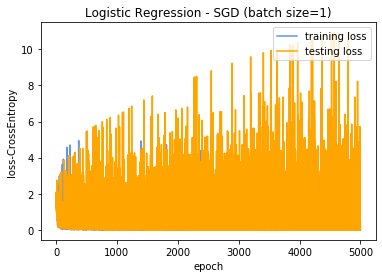

In [77]:
plt.title("Logistic Regression - SGD (batch size=1)")

plt.ylabel("loss-CrossEntropy")
plt.xlabel("epoch")

plt.plot(SGD_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(SGD_test_losses, linestyle='solid', color='orange', label='loss')
plt.legend(['training loss','testing loss'],loc='upper right')

plt.show()

Learning curve - accuracy

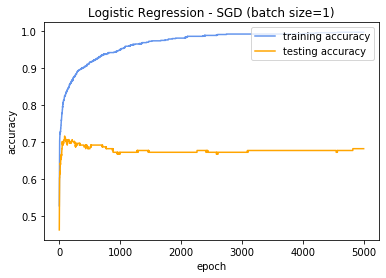

In [78]:
plt.title("Logistic Regression - SGD (batch size=1)")

plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.plot(SGD_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(SGD_test_acc, linestyle='solid', color='orange', label='loss')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')

plt.show()

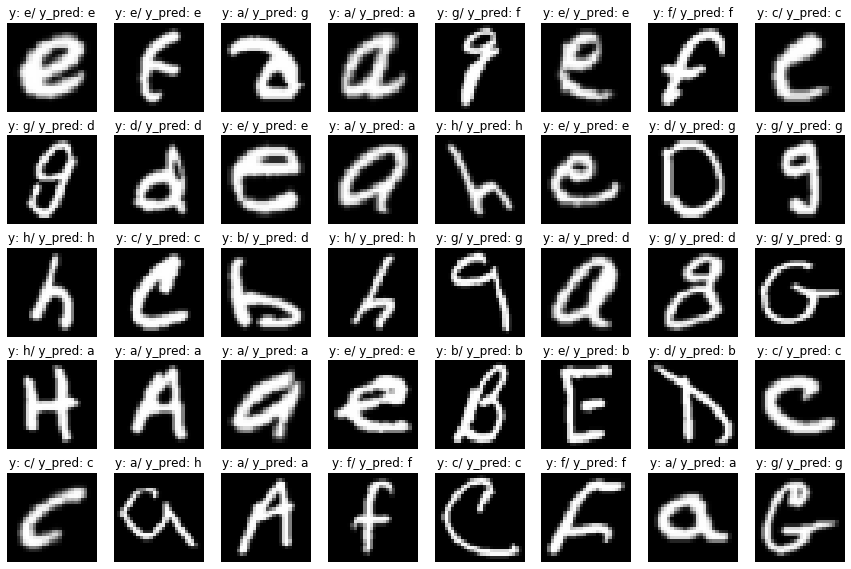

In [79]:
SGD_test_preds = predict(X_test, SGD_w, SGD_b)
class_list = ['a','b','c','d','e','f','g','h']

fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(Xtest[i], cmap='gray')
    
    ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=class_list[Ytest[i]], y_hat=class_list[SGD_test_preds[i]]))
    plt.axis('off')

## Mini-batch Gradient Descent

### batch_size = 8, lr = 0.1, epochs = 5000

In [80]:
start = time.time()

MGD8_w, MGD8_b, MGD8_train_losses, MGD8_test_losses, MGD8_train_acc, MGD8_test_acc = fit_GD(X_train, Y_train, X_test, Y_test, lr=0.1, c=8, epochs=5000, batch_size=8)
end = time.time()

MGD8_time = end - start
print("traing time: ", format(MGD8_time))


Epoch 0 ==> Training Loss = 2.060932704813999, Testing Loss = 2.079068221799033
Epoch 100 ==> Training Loss = 1.4566489492599566, Testing Loss = 1.0423632448988889
Epoch 200 ==> Training Loss = 0.7628373933835476, Testing Loss = 1.004447602476397
Epoch 300 ==> Training Loss = 0.7876267848607941, Testing Loss = 1.3207708036545858
Epoch 400 ==> Training Loss = 1.1580166480300662, Testing Loss = 1.3492012908711184
Epoch 500 ==> Training Loss = 0.3121384487134688, Testing Loss = 1.3733927378519888
Epoch 600 ==> Training Loss = 1.2204263639887827, Testing Loss = 1.0860273683192605
Epoch 700 ==> Training Loss = 0.5918384472067658, Testing Loss = 0.773918958249862
Epoch 800 ==> Training Loss = 1.186721310512284, Testing Loss = 0.81354905303279
Epoch 900 ==> Training Loss = 0.3872947690973711, Testing Loss = 0.7655260818945923
Epoch 1000 ==> Training Loss = 0.8274615258083883, Testing Loss = 1.0134145834689399
Epoch 1100 ==> Training Loss = 0.4723838726685603, Testing Loss = 0.2682137567718105

Learning curve - loss function

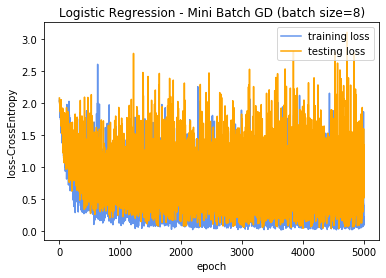

In [81]:
plt.title("Logistic Regression - Mini Batch GD (batch size=8)")

plt.ylabel("loss-CrossEntropy")
plt.xlabel("epoch")

plt.plot(MGD8_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD8_test_losses, linestyle='solid', color='orange', label='loss')
plt.legend(['training loss','testing loss'],loc='upper right')

plt.show()

Learning curve - accuracy

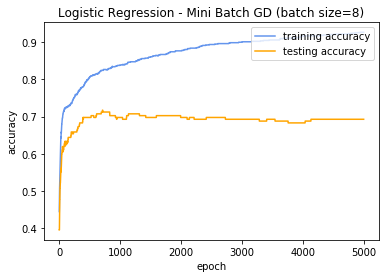

In [82]:
plt.title("Logistic Regression - Mini Batch GD (batch size=8)")

plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.plot(MGD8_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD8_test_acc, linestyle='solid', color='orange', label='loss')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')

plt.show()

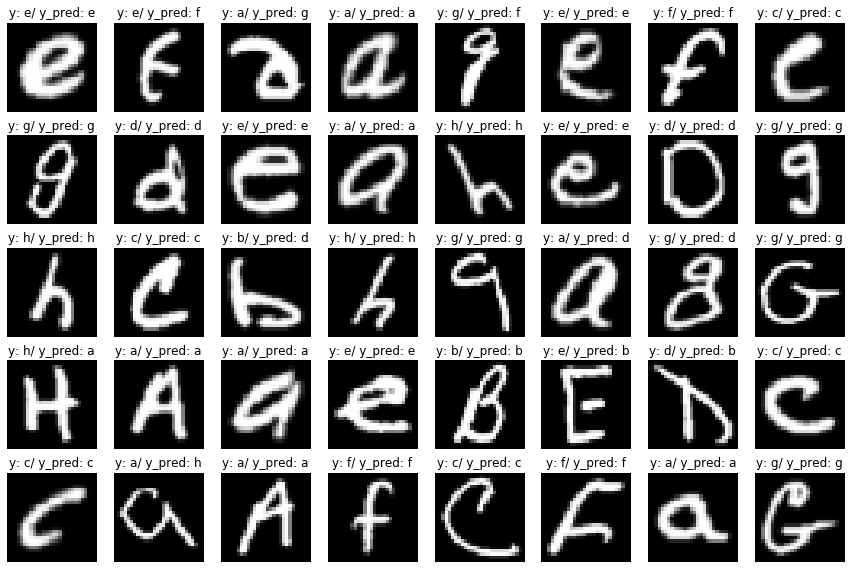

In [83]:
MGD8_test_preds = predict(X_test, MGD8_w, MGD8_b)
class_list = ['a','b','c','d','e','f','g','h']

fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(Xtest[i], cmap='gray')
    
    ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=class_list[Ytest[i]], y_hat=class_list[MGD8_test_preds[i]]))
    plt.axis('off')

### batch_size = 16, lr = 0.1, epochs = 5000

In [84]:
start = time.time()

MGD16_w, MGD16_b, MGD16_train_losses, MGD16_test_losses, MGD16_train_acc, MGD16_test_acc = fit_GD(X_train, Y_train, X_test, Y_test, lr=0.1, c=8, epochs=5000, batch_size=16)
end = time.time()

MGD16_time = end - start
print("traing time: ", format(MGD16_time))

Epoch 0 ==> Training Loss = 2.071842188180195, Testing Loss = 2.071768648081609
Epoch 100 ==> Training Loss = 1.3568489806168407, Testing Loss = 1.5496847643257565
Epoch 200 ==> Training Loss = 1.2080535233928105, Testing Loss = 1.4427433082077836
Epoch 300 ==> Training Loss = 0.8338869462809505, Testing Loss = 1.1162699289875506
Epoch 400 ==> Training Loss = 1.9029056007268477, Testing Loss = 1.417958153815704
Epoch 500 ==> Training Loss = 1.4481508577452367, Testing Loss = 1.369450834179954
Epoch 600 ==> Training Loss = 0.45219647521300294, Testing Loss = 0.9882374194376238
Epoch 700 ==> Training Loss = 0.7940069056487694, Testing Loss = 1.0274562619484966
Epoch 800 ==> Training Loss = 0.9162389808101388, Testing Loss = 0.7655530331321045
Epoch 900 ==> Training Loss = 0.8842427182014166, Testing Loss = 0.8928712147105882
Epoch 1000 ==> Training Loss = 1.1301095081725065, Testing Loss = 0.7887044132313553
Epoch 1100 ==> Training Loss = 0.5676690093603437, Testing Loss = 0.671746437582

Learning curve - loss function

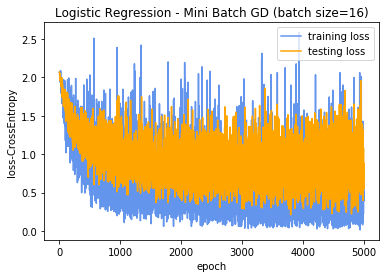

In [85]:
plt.title("Logistic Regression - Mini Batch GD (batch size=16)")

plt.ylabel("loss-CrossEntropy")
plt.xlabel("epoch")

plt.plot(MGD16_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD16_test_losses, linestyle='solid', color='orange', label='loss')
plt.legend(['training loss','testing loss'],loc='upper right')

plt.show()

Learning curve - accuracy

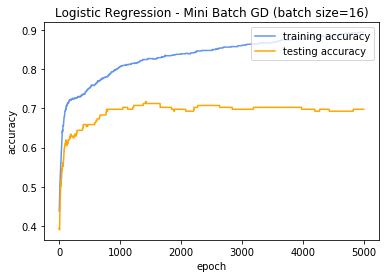

In [86]:
plt.title("Logistic Regression - Mini Batch GD (batch size=16)")

plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.plot(MGD16_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD16_test_acc, linestyle='solid', color='orange', label='loss')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')

plt.show()

### batch_size = 64, lr = 0.1, epochs = 5000

In [87]:
start = time.time()

MGD64_w, MGD64_b, MGD64_train_losses, MGD64_test_losses, MGD64_train_acc, MGD64_test_acc = fit_GD(X_train, Y_train, X_test, Y_test, lr=0.1, c=8, epochs=5000, batch_size=64)
end = time.time()

MGD64_time = end - start
print("traing time: ", format(MGD64_time))

Epoch 0 ==> Training Loss = 2.078007612817658, Testing Loss = 2.077106050811784
Epoch 100 ==> Training Loss = 1.9219032786278105, Testing Loss = 1.9270323711820663
Epoch 200 ==> Training Loss = 1.8151734432174378, Testing Loss = 1.8459845807967037
Epoch 300 ==> Training Loss = 1.6683851014153905, Testing Loss = 1.8350976524328242
Epoch 400 ==> Training Loss = 1.5347911171127029, Testing Loss = 1.682492067434256
Epoch 500 ==> Training Loss = 1.4747642552670914, Testing Loss = 1.4770668480784008
Epoch 600 ==> Training Loss = 1.379853402309131, Testing Loss = 1.472419855916743
Epoch 700 ==> Training Loss = 1.4027770156084602, Testing Loss = 1.3158270044781135
Epoch 800 ==> Training Loss = 1.4018642661570755, Testing Loss = 1.3311553404017102
Epoch 900 ==> Training Loss = 1.32994039673856, Testing Loss = 1.3397046927909655
Epoch 1000 ==> Training Loss = 1.095645474542087, Testing Loss = 1.3067709021841907
Epoch 1100 ==> Training Loss = 1.1481957614631315, Testing Loss = 1.3459871720324574


Learning curve - loss function

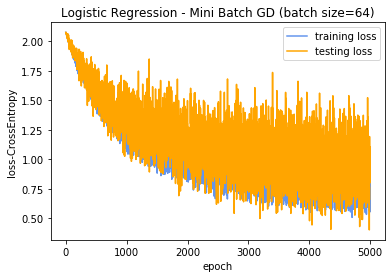

In [88]:
plt.title("Logistic Regression - Mini Batch GD (batch size=64)")

plt.ylabel("loss-CrossEntropy")
plt.xlabel("epoch")

plt.plot(MGD64_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD64_test_losses, linestyle='solid', color='orange', label='loss')
plt.legend(['training loss','testing loss'],loc='upper right')

plt.show()

Learning curve - accuracy

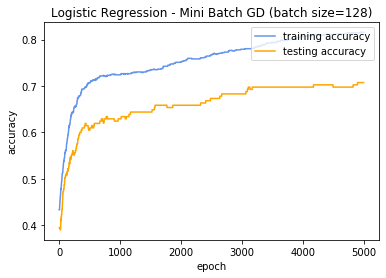

In [89]:
plt.title("Logistic Regression - Mini Batch GD (batch size=128)")

plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.plot(MGD64_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD64_test_acc, linestyle='solid', color='orange', label='loss')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')

plt.show()

### batch_size = 128, lr = 0.1, epochs = 5000

In [90]:
start = time.time()

MGD128_w, MGD128_b, MGD128_train_losses, MGD128_test_losses, MGD128_train_acc, MGD128_test_acc = fit_GD(X_train, Y_train, X_test, Y_test, lr=0.1, c=8, epochs=5000, batch_size=128)
end = time.time()

MGD128_time = end - start
print("traing time: ", format(MGD128_time))

Epoch 0 ==> Training Loss = 2.078667536310239, Testing Loss = 2.0786278604697936
Epoch 100 ==> Training Loss = 1.9898053524591532, Testing Loss = 1.9987978937701292
Epoch 200 ==> Training Loss = 1.9423296314952125, Testing Loss = 1.942799364433985
Epoch 300 ==> Training Loss = 1.8501689785081645, Testing Loss = 1.8975113616889667
Epoch 400 ==> Training Loss = 1.7575114247567636, Testing Loss = 1.8120949895437946
Epoch 500 ==> Training Loss = 1.7376359833666806, Testing Loss = 1.802747579401773
Epoch 600 ==> Training Loss = 1.6968385230743923, Testing Loss = 1.7349680412884598
Epoch 700 ==> Training Loss = 1.6536969610015029, Testing Loss = 1.7252960492763427
Epoch 800 ==> Training Loss = 1.5619479680472736, Testing Loss = 1.6422050683734848
Epoch 900 ==> Training Loss = 1.5118234903447725, Testing Loss = 1.6606437388792514
Epoch 1000 ==> Training Loss = 1.4603347166999943, Testing Loss = 1.6113376414041891
Epoch 1100 ==> Training Loss = 1.4397822702885092, Testing Loss = 1.575409154524

Learning curve - loss function

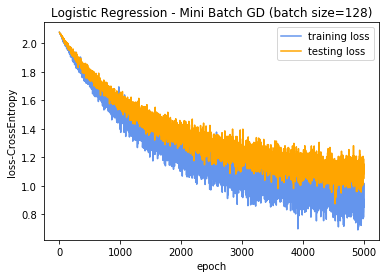

In [91]:
plt.title("Logistic Regression - Mini Batch GD (batch size=128)")

plt.ylabel("loss-CrossEntropy")
plt.xlabel("epoch")

plt.plot(MGD128_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD128_test_losses, linestyle='solid', color='orange', label='loss')
plt.legend(['training loss','testing loss'],loc='upper right')

plt.show()

Learning curve - accuracy

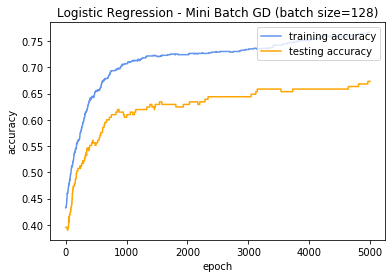

In [92]:
plt.title("Logistic Regression - Mini Batch GD (batch size=128)")

plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.plot(MGD128_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

plt.plot(MGD128_test_acc, linestyle='solid', color='orange', label='loss')
plt.legend(['training accuracy','testing accuracy'],loc='upper right')

plt.show()

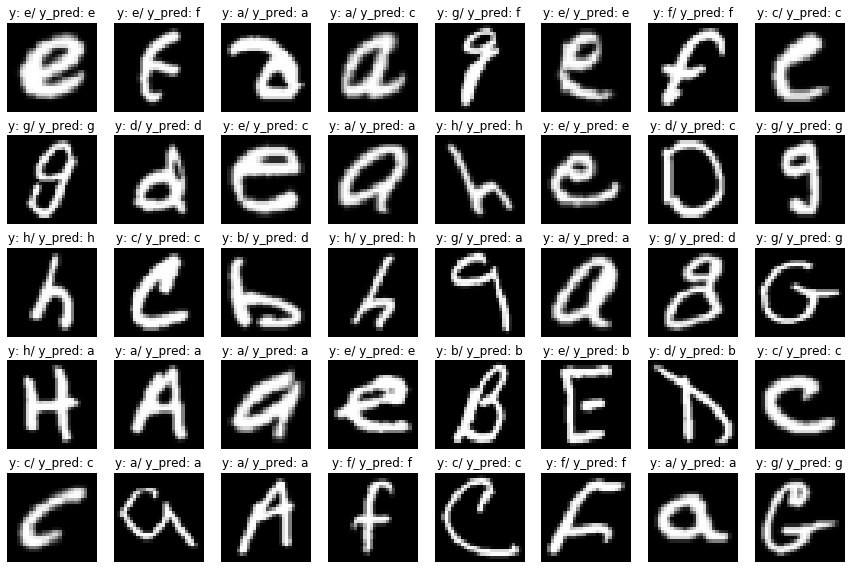

In [93]:
MGD128_test_preds = predict(X_test, MGD128_w, MGD128_b)
class_list = ['a','b','c','d','e','f','g','h']

fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(Xtest[i], cmap='gray')
    
    ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=class_list[Ytest[i]], y_hat=class_list[MGD128_test_preds[i]]))
    plt.axis('off')

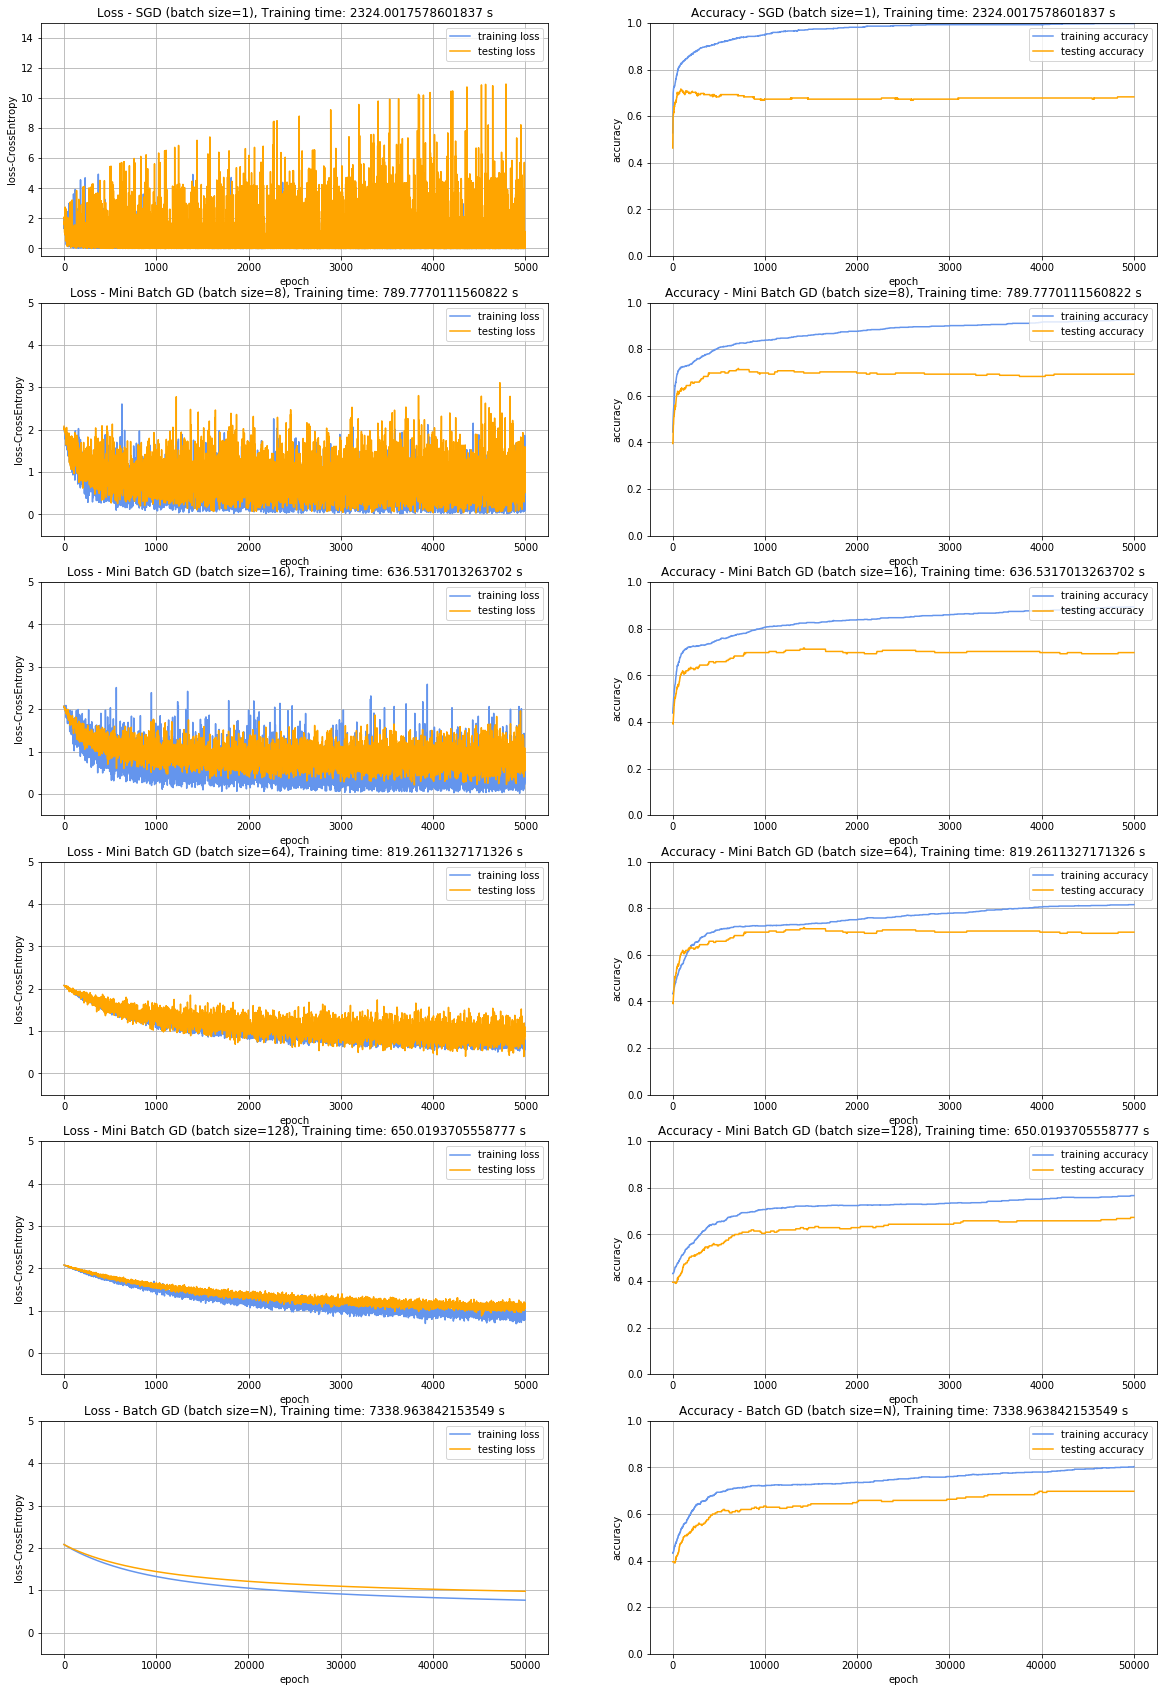

In [94]:
from matplotlib.pyplot import MultipleLocator

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))

# y_major_locator = MultipleLocator(5) 

########################################################################################################
ax1.set_title("Loss - SGD (batch size=1), Training time: " + str(format(SGD_time)) + ' s')

ax1.set_ylabel("loss-CrossEntropy")
ax1.set_xlabel("epoch")

ax1.plot(SGD_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

ax1.plot(SGD_test_losses, linestyle='solid', color='orange', label='loss')
ax1.legend(['training loss','testing loss'],loc='upper right')


ax1.set_ylim(-0.5,15)
ax1.grid('on')
# ax1.yaxis.set_major_locator(y_major_locator)

ax2.set_title("Accuracy - SGD (batch size=1), Training time: " + str(format(SGD_time)) + ' s')

ax2.set_ylabel("accuracy")
ax2.set_xlabel("epoch")

ax2.plot(SGD_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

ax2.plot(SGD_test_acc, linestyle='solid', color='orange', label='loss')
ax2.legend(['training accuracy','testing accuracy'],loc='upper right')

ax2.set_ylim(0.0,1.0)
ax2.grid('on')

########################################################################################################
ax3.set_title("Loss - Mini Batch GD (batch size=8), Training time: " + str(format(MGD8_time)) + ' s')

ax3.set_ylabel("loss-CrossEntropy")
ax3.set_xlabel("epoch")

ax3.plot(MGD8_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

ax3.plot(MGD8_test_losses, linestyle='solid', color='orange', label='loss')
ax3.legend(['training loss','testing loss'],loc='upper right')

ax3.set_ylim(-0.5,5)
ax3.grid('on')

ax4.set_title("Accuracy - Mini Batch GD (batch size=8), Training time: " + str(format(MGD8_time)) + ' s')

ax4.set_ylabel("accuracy")
ax4.set_xlabel("epoch")

ax4.plot(MGD8_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

ax4.plot(MGD8_test_acc, linestyle='solid', color='orange', label='loss')
ax4.legend(['training accuracy','testing accuracy'],loc='upper right')

ax4.set_ylim(0.0,1.0)
ax4.grid('on')

########################################################################################################
ax5.set_title("Loss - Mini Batch GD (batch size=16), Training time: " + str(format(MGD16_time)) + ' s')

ax5.set_ylabel("loss-CrossEntropy")
ax5.set_xlabel("epoch")

ax5.plot(MGD16_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

ax5.plot(MGD16_test_losses, linestyle='solid', color='orange', label='loss')
ax5.legend(['training loss','testing loss'],loc='upper right')

ax5.set_ylim(-0.5,5)
ax5.grid('on')

ax6.set_title("Accuracy - Mini Batch GD (batch size=16), Training time: " + str(format(MGD16_time)) + ' s')

ax6.set_ylabel("accuracy")
ax6.set_xlabel("epoch")

ax6.plot(MGD16_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

ax6.plot(MGD16_test_acc, linestyle='solid', color='orange', label='loss')
ax6.legend(['training accuracy','testing accuracy'],loc='upper right')

ax6.set_ylim(0.0,1.0)
ax6.grid('on')

########################################################################################################
ax7.set_title("Loss - Mini Batch GD (batch size=64), Training time: " + str(format(MGD64_time)) + ' s')

ax7.set_ylabel("loss-CrossEntropy")
ax7.set_xlabel("epoch")

ax7.plot(MGD64_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

ax7.plot(MGD64_test_losses, linestyle='solid', color='orange', label='loss')
ax7.legend(['training loss','testing loss'],loc='upper right')

ax7.set_ylim(-0.5,5)
ax7.grid('on')

ax8.set_title("Accuracy - Mini Batch GD (batch size=64), Training time: " + str(format(MGD64_time)) + ' s')

ax8.set_ylabel("accuracy")
ax8.set_xlabel("epoch")

ax8.plot(MGD64_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

ax8.plot(MGD16_test_acc, linestyle='solid', color='orange', label='loss')
ax8.legend(['training accuracy','testing accuracy'],loc='upper right')

ax8.set_ylim(0.0,1.0)
ax8.grid('on')

########################################################################################################
ax9.set_title("Loss - Mini Batch GD (batch size=128), Training time: " + str(format(MGD128_time)) + ' s')

ax9.set_ylabel("loss-CrossEntropy")
ax9.set_xlabel("epoch")

ax9.plot(MGD128_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

ax9.plot(MGD128_test_losses, linestyle='solid', color='orange', label='loss')
ax9.legend(['training loss','testing loss'],loc='upper right')

ax9.set_ylim(-0.5,5)
ax9.grid('on')

ax10.set_title("Accuracy - Mini Batch GD (batch size=128), Training time: " + str(format(MGD128_time)) + ' s')

ax10.set_ylabel("accuracy")
ax10.set_xlabel("epoch")

ax10.plot(MGD128_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

ax10.plot(MGD128_test_acc, linestyle='solid', color='orange', label='loss')
ax10.legend(['training accuracy','testing accuracy'],loc='upper right')

ax10.set_ylim(0.0,1.0)
ax10.grid('on')

########################################################################################################
ax11.set_title("Loss - Batch GD (batch size=N), Training time: " + str(format(BGD_time)) + ' s')

ax11.set_ylabel("loss-CrossEntropy")
ax11.set_xlabel("epoch")

ax11.plot(BGD_train_losses, linestyle='solid', color='cornflowerblue', label='loss')

ax11.plot(BGD_test_losses, linestyle='solid', color='orange', label='loss')
ax11.legend(['training loss','testing loss'],loc='upper right')

ax11.set_ylim(-0.5,5)
ax11.grid('on')

ax12.set_title("Accuracy - Batch GD (batch size=N), Training time: " + str(format(BGD_time)) + ' s')

ax12.set_ylabel("accuracy")
ax12.set_xlabel("epoch")

ax12.plot(BGD_train_acc, linestyle='solid', color='cornflowerblue', label='loss')

ax12.plot(BGD_test_acc, linestyle='solid', color='orange', label='loss')
ax12.legend(['training accuracy','testing accuracy'],loc='upper right')

ax12.set_ylim(0.0,1.0)

ax12.grid('on')

plt.savefig("Result.png")

plt.show()

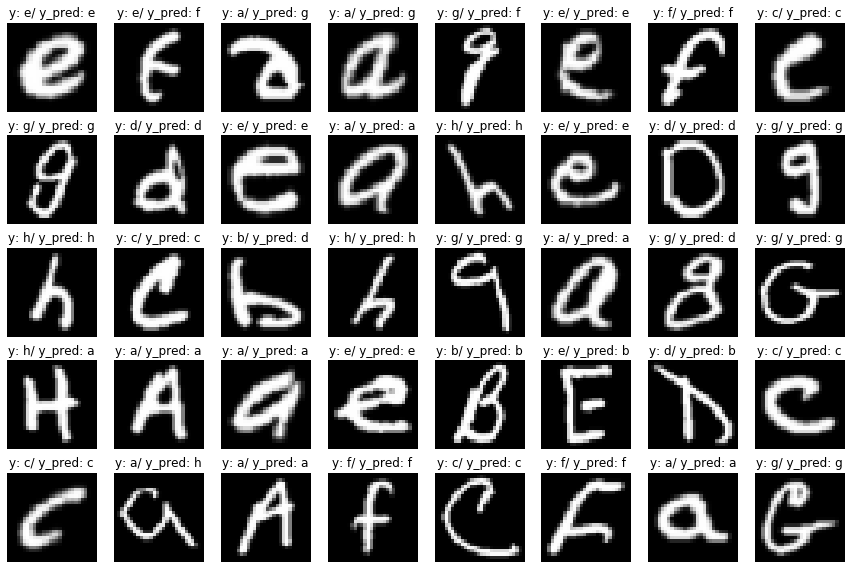

In [95]:
MGD16_test_preds = predict(X_test, MGD16_w, MGD16_b)
class_list = ['a','b','c','d','e','f','g','h']

fig = plt.figure(figsize=(15,10))
for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(Xtest[i], cmap='gray')
    
    ax.set_title('y: {y}/ y_pred: {y_hat}'.format(y=class_list[Ytest[i]], y_hat=class_list[MGD16_test_preds[i]]))
    plt.axis('off')

In [96]:
# for i in range(50):
#     for phase in ['train', 'test']:
#         if phase == 'train':
#             print("train")
#         elif phase == 'test':
#             print("test")

In [97]:
# https://www.kaggle.com/code/pratinavseth/regression-mini-batch-gradient-descent-scratch/notebook

In [98]:
# https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

In [99]:
# https://www.kaggle.com/code/pratinavseth/regression-mini-batch-gradient-descent-scratch/notebook